# Analyse des NAN

On récupère les bases de données étudiées

In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("C:/Users/Administrateur.LAPTOP-FH8TB47B/Desktop/Projet_assemblee/liste_mandatdef.csv") 
df_depu=pd.read_csv("C:/Users/Administrateur.LAPTOP-FH8TB47B/Desktop/Projet_assemblee/table_depute.csv")


### Profil général des Nan

Les problèmes ne concerne que le département, le groupe ou le régime politique

In [29]:
df.isna().any()

Unnamed: 0          False
Département          True
Groupe               True
Législature         False
Mandat              False
Régime politique     True
Nom                 False
dtype: bool

Les 2 seuls Na de régime concerne la législature en cours et sont négligeables

In [28]:
df[df["Régime politique"].isna()]

,Unnamed: 0,Département,Groupe,Législature,Mandat,Régime politique,Nom
27765,0,NaN,NaN,(Législature en cours),Depuis le 2 novembre 2020 (mandat en cours),NaN,"Joseph, François, Marie Kermorial"
34781,0,NaN,NaN,(Législature en cours),Depuis le 2 novembre 2020 (mandat en cours),NaN,"Emmanuel, Joseph Sieyès"


### Les na de groupes

In [55]:
pop_regime=pd.DataFrame(df.groupby("Régime politique").count()["Unnamed: 0"])
pop_regime["nb groupe Na"]=df[df["Groupe"].isna()].groupby("Régime politique").count()["Unnamed: 0"]
pop_regime["% groupe Na"]=100*df[df["Groupe"].isna()].groupby("Régime politique").count()["Unnamed: 0"]/df.groupby("Régime politique").count()["Unnamed: 0"]
pop_regime

,Unnamed: 0,nb groupe Na,% groupe Na
Régime politique,,,
Assemblée Nationale,873,25,2.863688
Cent-Jours,624,503,80.608974
Cinquième République - Assemblée nationale,8056,84,1.042701
Consulat et Premier Empire,926,740,79.913607
Deuxième République,1744,152,8.715596
Gouvernement provisoire de la République française,1179,7,0.593723
Monarchie de Juillet - Chambre des députés,3697,245,6.626995
Première Restauration,231,223,96.536797
Quatrième République - Assemblée nationale,1940,21,1.082474


On a très peu d'information pour certains régimes anciens mais il manque bcp moins de groupe pour les régimes plus récents

Remarquons d'autant plus que certains députés sont par défintion, sans groupes. Voici par exmple des fiches de députés où aucun groupe n'est indiqué: 
- http://www2.assemblee-nationale.fr/sycomore/fiche/(num_dept)/18564
- http://www2.assemblee-nationale.fr/sycomore/fiche/(num_dept)/5994
- http://www2.assemblee-nationale.fr/sycomore/fiche/(num_dept)/15632, pour le deuxième mandat

### Les na de département d'élection

Les nan de département sont très majoitairement issu de la révolution, il faudra le prendre en compte dans nos analyses :

In [64]:
df[df['Département'].isna()].count()[0]

197

In [63]:
df[df['Département'].isna()][df['Régime politique']!='Révolution'].count()[0]

<ipython-input-63-22e0e2497d3b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Département'].isna()][df['Régime politique']!='Révolution'].count()[0]


10

### Les na de départment de naissance

On va extraire la date auxquels ont trouve des département de naissance Na ou inconnu et ainsi voir que députés dont on ne connait pas le lieu de naissance sont très majoritairement issu de la cinquième république ou du debut du $\text{XIX}^è$ siècle.

##### Les 'vraies' Nan sont concentrées sur la 3è république

In [67]:
d=pd.DataFrame([int(x[-4:]) for x in df_depu[df_depu["Département de naissance"].isna()]["Né le"]])[0]
d.count()

524

<AxesSubplot:>

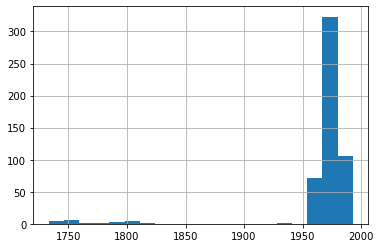

In [68]:
d.hist(bins=20)

##### Les département dont la valeur est 'inconnu' sont réaparties surtout aux extrémités de la période analysée 

In [73]:
a=df_depu[df_depu["Département de naissance"]=="Inconnu"].set_index("Nom").drop("Unnamed: 0",axis=1).drop("Unnamed: 0.1",axis=1)
a=a[~a["Né le"].isna()]["Né le"]
print("Il y a",a.count(), "départements de naissance inconnus")

Il y a 2192 départements de naissance inconnus


<AxesSubplot:>

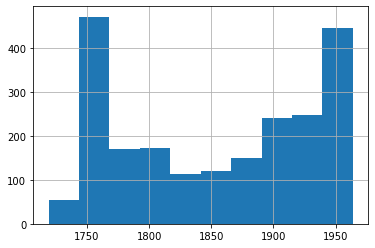

In [98]:
pd.DataFrame([int(x[-4:]) for x in a])[0].hist()

### Le problèmes de merge

Certains députés ont le même nom, et comme nous avons choisi uniquement cette variable pour faire nos 'join', cela a créé des problèmes et des incohérences. Voici la liste de ces députés :

In [16]:
pb=df_depu.groupby("Nom").count().sort_values(by="Né le")["Né le"]
#On compte le nombre de "ligne par nom"
pb[pb>1].index
#S'il y en a plus de 2, c'est bon

Index(['Pierre André', 'Pierre Michel', 'André Lebon',
       'Eugène Janvier de la Motte', 'Achille Fould', 'André Mercier',
       'Jean-Michel Boucheron', 'Jean-Baptiste Dumas', 'Jean Moulin',
       'Jean-Louis Leclerc', 'Joseph Faure', 'Auguste Isaac', 'Léon Joubert',
       'Paul Ribeyre', 'Jacques Houssin', 'Jules Gaillard', 'Jean Bernard',
       'Jean Duprat', 'Jean Bertrand', 'Jean-Baptiste Perret',
       'Pierre Bernard', 'Gabriel Miossec', 'Joseph Bernard', 'Louis Dupont',
       'Paul Giacobbi', 'Bernard, Marie Sage', 'Paul Mayaud',
       'Victor Guichard', 'Joachim Murat', 'Jacques Defermon des Chapelières',
       'André Parmentier', 'Joseph Garat', 'Jean Garnier',
       'Jean-Baptiste Jourdan', 'Antoine, Bernard Finot', 'Pierre Lucas',
       'Emile Faure', 'Joseph Vidal', 'Pierre Legrand', 'François d'Harcourt',
       'Emile Magniez', 'Nicolas, Charles, Victor Oudinot Duc de Reggio',
       'Etienne Geoffroy-Saint-Hilaire', 'Jean-Louis Masson',
       'Geoffroy de 

Tout d'abord, le premier problème c'est posé lorsque l'on a essayé d'attribué le département de naissance et de mort aux députés. Ces variables étaient stockées dans une base différentes que la date de naissance des députés (récupérée en même temps que le _href_ leur correspondant. Ainsi, si un député a des homonymes, chacune des occurences du nom va être répété par nombre de département de naissance différent.

L'autre problème est qu'on va assigner une mauvaise date de naissance et donc un mauvais âge au député (il peut être négatif). Ce problème va se répercuter sur tous les député du même nom car on prend l'âge du premier mandat de tous les députés ayant le même nom.

Exemple :

In [19]:
df_depu[df_depu["Nom"]=='Pierre Dumas']

,Unnamed: 0,Unnamed: 0.1,Nom,Né le,Département de naissance,Département de mort,nombre de mandat,age en année,premier dpt,élection locale
2799,2799,2799,Pierre Dumas,15 novembre 1924,Savoie,Savoie,72.0,-113.612594,Savoie,True
2800,2800,2800,Pierre Dumas,15 novembre 1924,Ariège,Ariège,72.0,-113.612594,Savoie,False
2801,2801,2801,Pierre Dumas,15 novembre 1924,Haute-Vienne,Haute-Vienne,72.0,-113.612594,Savoie,False
2802,2802,2802,Pierre Dumas,1er août 1891,Savoie,Savoie,72.0,-113.612594,Savoie,True
2803,2803,2803,Pierre Dumas,1er août 1891,Ariège,Ariège,72.0,-113.612594,Savoie,False
2804,2804,2804,Pierre Dumas,1er août 1891,Haute-Vienne,Haute-Vienne,72.0,-113.612594,Savoie,False
2805,2805,2805,Pierre Dumas,24 juin 1750,Savoie,Savoie,72.0,-113.612594,Savoie,True
2806,2806,2806,Pierre Dumas,24 juin 1750,Ariège,Ariège,72.0,-113.612594,Savoie,False
2807,2807,2807,Pierre Dumas,24 juin 1750,Haute-Vienne,Haute-Vienne,72.0,-113.612594,Savoie,False
